In [9]:
import sys
import pandas as pd
import matplotlib as plt
from datetime import date, datetime, timedelta
import matplotlib.dates as mdates
from PIL import Image as im
from matplotlib import colors

from config import *
from SE_Interface import *

In [6]:
se_interface = SE_Interface()

summer = datetime(year=2021, month=8, day=15, hour=23)
now = datetime.now()
data = se_interface.request_SitePowerDetailed(now, timedelta(days=1))
#data = se_interface.request_SitePowerDetailed(summer, timedelta(days=1))

Requesting: https://monitoringapi.solaredge.com/site/2130766/powerDetails?meters=Consumption,Production&startTime=2021-12-15 01:40:25&endTime=2021-12-16 01:40:25&api_key=NTT5LNJGA5CDCFI9OZGZCX2W1VD3CCW2


In [7]:
data

,Consumption,Production
Datetime,,
2021-12-15 01:30:00,1367.8910,0.0
2021-12-15 01:45:00,1629.8054,0.0
2021-12-15 02:00:00,1690.4904,0.0
2021-12-15 02:15:00,1327.7227,0.0
2021-12-15 02:30:00,1335.8842,0.0
...,...,...
2021-12-16 00:30:00,1379.0643,0.0
2021-12-16 00:45:00,1348.4812,0.0
2021-12-16 01:00:00,1313.8855,0.0


TypeError: show() got an unexpected keyword argument 'cmap'

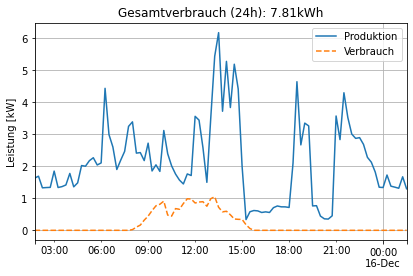

In [13]:
#summer = datetime(year=2021, month=8, day=15, hour=23, minute=15)
#data = se_interface.request_SitePowerDetailed(summer, timedelta(days=1))

df = data.copy()
df = df / 1000 # set to KWh
df = df.iloc[1: , :]    # Drop first row

# Plot lines
scaling = 120
width = EPD_WIDTH / scaling
height = EPD_HEIGHT / scaling
df.plot(style=["-", "--"], figsize=(width, height))

# Add total consumption
total = (df["Consumption"].sum() - df["Production"].sum()) / (24)
plt.title(f"Gesamtverbrauch (24h): {total:.2f}kWh")

# Formatting
plt.grid()
plt.xlabel("")
plt.ylabel("Leistung [kW]")
plt.legend(labels=["Produktion", "Verbrauch"])


cmap = colors.ListedColormap(['black', 'white'])

# Output
plt.savefig("../out/plot.png", dpi=500)
plt.show()

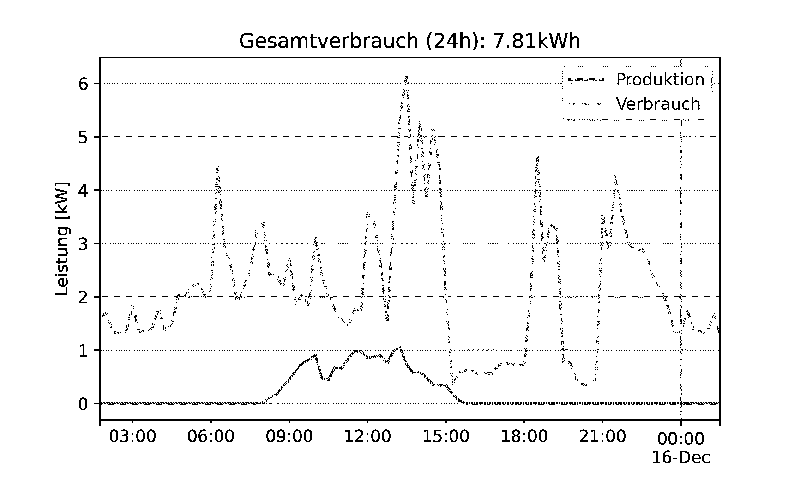

In [ ]:
# png to bmp
from PIL import Image

file_in = "../out/plot.png"
img = Image.open(file_in).convert("1")
img = img.resize((800,480), Image.HAMMING)
file_out = "../out/plot.bmp"
img.save(file_out)
img


In [ ]:
# include parent folder (Notebook version)
import os, sys, inspect

notebook_dir = os.getcwd()
parentdir = os.path.dirname(notebook_dir)

sys.path.insert(0, parentdir)


from lib.epd7in5_V2 import *
from PIL import Image,ImageDraw,ImageFont

epd = EPD()

logging.info("init and Clear")
epd.init()
epd.Clear()

In [ ]:
from lib.epd7in5_V2 import *
from PIL import Image,ImageDraw,ImageFont

epd = EPD()

logging.info("init and Clear")
epd.init()
epd.Clear()

In [ ]:
Himage = Image.open("../out/plot.bmp")
epd.display(epd.getbuffer(Himage))